In [2]:
import numpy as np
import matplotlib.pyplot as plt
def omp(A, y, s):
    """
    Implementation of OMP algorithm.
    """
    residual = y
    support = []
    for i in range(s):
        scores = np.abs(A.T @ residual)
        index = np.argmax(scores)
        support.append(index)
        x = np.zeros(A.shape[1])
        x[support] = np.linalg.pinv(A[:, support]) @ y
        residual = y - A @ x
        if np.linalg.norm(residual) < 1e-6:
            break
    x_omp = np.zeros(A.shape[1])
    for sp in support:
        x_omp[support]=x[support]
    return x_omp, support

def noiseless_phase_transition_omp(N, M_values, s_max):
    """
    Generate noiseless phase transition plot for OMP algorithm.
    """
    avg_norm_err = np.zeros((len(M_values), s_max+1))
    # for n in range(len(N_values)):
    #     N = N_values[n]
    for m in range(len(M_values)):
        M = M_values[m]
        ##### Generating A #########
        A = np.random.normal(size=(M, N))
        A /= np.linalg.norm(A, axis=0)
        ############################
        for s in range(1, s_max+1):
            norm_err_arr = np.zeros(2000)
            for i in range(2000):
                #x = generate_sparse_vector(N, s)
                ########### Generating x  ###############
                index=0
                support=np.zeros(s,dtype=int)
                while(index!=s):
                    gen=np.random.uniform(1,N)
                    if(int(gen) not in support):
                        support[index]=int(gen)
                        index+=1
                x=np.zeros(N)
                for j in support:
                    k=np.random.uniform(-10,11)
                    while(int(k)==0):
                        k=np.random.uniform(-10,11)
                    x[j]=k
                ####################################
                y = A @ x
                x_omp, support = omp(A, y, s)
                # Calculate the Normalized Error
                norm_err = np.linalg.norm(x - x_omp) / np.linalg.norm(x)
                norm_err_arr[i] = norm_err
            avg_norm_err[m, s] = np.mean(norm_err_arr)
    return avg_norm_err

# Define parameters
def solve_problem_normalized(n):
    N_values = n
    M_values = np.arange(1, n)
    s_max = int(n*7/20)

    # Generate noiseless phase transition plot for exact support recovery probability
    avg_norm_err = noiseless_phase_transition_omp(N_values, M_values, s_max)

    # Plot the results as a 2D image
    # for n in range(len(N_values)):
      #N = N_values[n]
    N = N_values
    plt.imshow(avg_norm_err, origin='lower', aspect='auto', cmap='gray_r', extent=[1, M_values[-1], 1, s_max])
    plt.colorbar()
    plt.xlabel('M')
    plt.ylabel('smax')
    plt.title('Noiseless Phase Transition Plot (Normalized Error), N=20')
    plt.show()

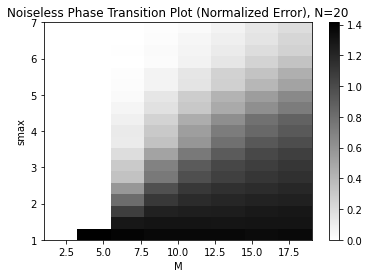

In [3]:
solve_problem_normalized(20)